In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Load the dataset
file_path = 'sentimentdataset.csv'
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df_cleaned.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


In [5]:
# Statistical summary of numerical columns
stat_summary = df_cleaned.describe()
print("Statistical Summary:\n", stat_summary)

Statistical Summary:
          Retweets       Likes         Year       Month         Day        Hour
count  732.000000  732.000000   732.000000  732.000000  732.000000  732.000000
mean    21.508197   42.901639  2020.471311    6.122951   15.497268   15.521858
std      7.061286   14.089848     2.802285    3.411763    8.474553    4.113414
min      5.000000   10.000000  2010.000000    1.000000    1.000000    0.000000
25%     17.750000   34.750000  2019.000000    3.000000    9.000000   13.000000
50%     22.000000   43.000000  2021.000000    6.000000   15.000000   16.000000
75%     25.000000   50.000000  2023.000000    9.000000   22.000000   19.000000
max     40.000000   80.000000  2023.000000   12.000000   31.000000   23.000000


In [6]:
# Sentiment distribution
sentiment_counts = df_cleaned['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

Sentiment Distribution:
 Sentiment
 Positive                 44
 Joy                      42
 Excitement               32
 Neutral                  14
 Contentment              14
 Happy                    14
 Hopeful                   9
 Sad                       9
 Gratitude                 9
 Curiosity                 8
 Embarrassed               8
 Loneliness                7
 Elation                   6
 Bad                       6
 Despair                   6
 Hate                      6
 Playful                   6
 Gratitude                 5
 Curiosity                 5
 Enthusiasm                5
 Inspired                  5
 Empowerment               5
 Contentment               5
 Serenity                  5
 Determination             5
 Acceptance                5
 Ambivalence               5
 Nostalgia                 5
 Melancholy                5
 Numbness                  5
 Confusion                 5
 Serenity                  5
 Indifference              5
 Frustra

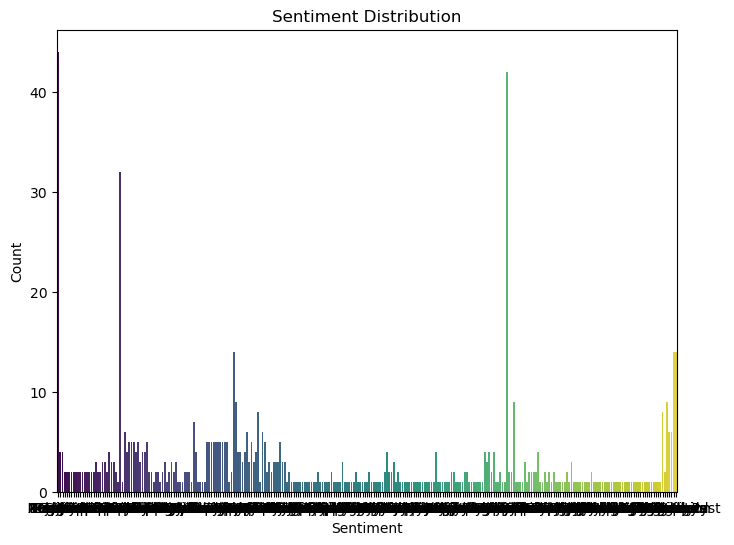

In [7]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

* The majority of posts have a "Positive" sentiment.
* Other common sentiments include "Joy" and "Excitement."
* A variety of sentiments are present, indicating diverse emotions expressed in the posts.

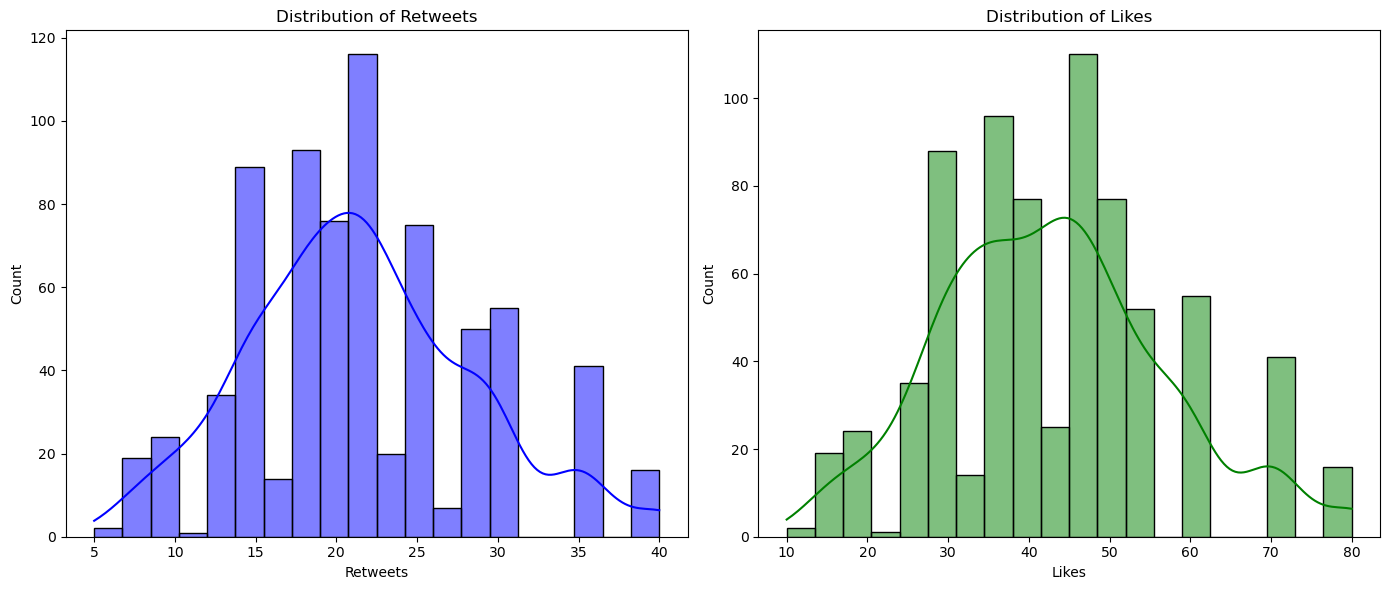

In [8]:
# Analyze the distribution of retweets and likes
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Retweets'], bins=20, kde=True, color='blue')
plt.title('Distribution of Retweets')
plt.xlabel('Retweets')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Likes'], bins=20, kde=True, color='green')
plt.title('Distribution of Likes')
plt.xlabel('Likes')

plt.tight_layout()
plt.show()


* The distribution of retweets is fairly normal, with most posts receiving between 10 and 40 retweets.
* Likes distribution is also fairly normal, with most posts receiving between 30 and 50 likes.
* Both distributions show a tendency for posts to receive moderate engagement, with a few outliers receiving significantly higher engagement.

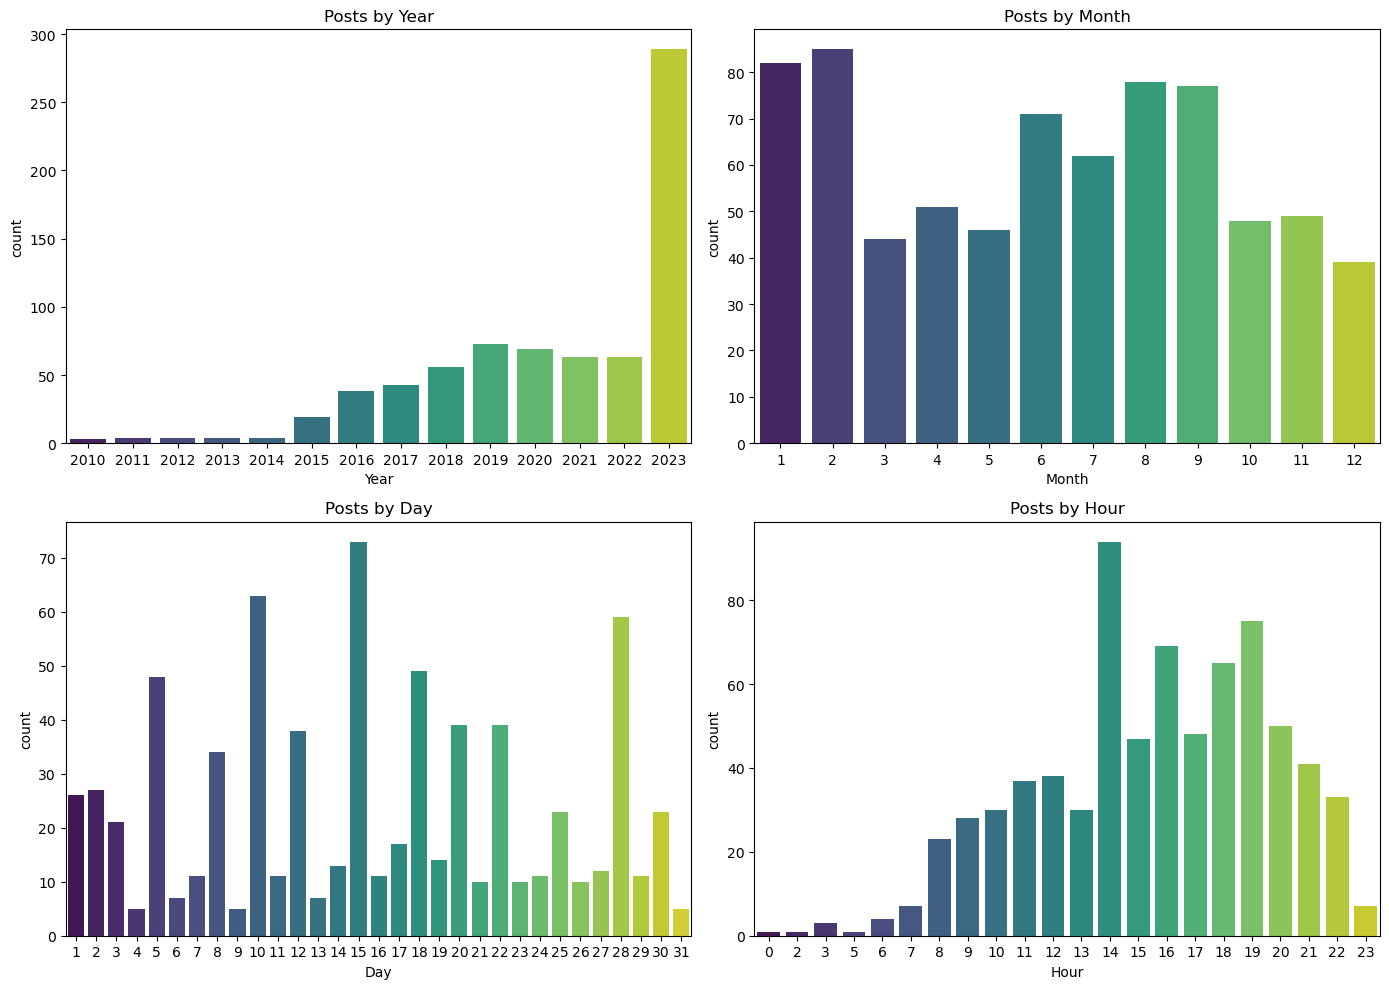

In [9]:
# Time Analysis: posts by year, month, day, hour
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=df_cleaned, x='Year', palette='viridis')
plt.title('Posts by Year')

plt.subplot(2, 2, 2)
sns.countplot(data=df_cleaned, x='Month', palette='viridis')
plt.title('Posts by Month')

plt.subplot(2, 2, 3)
sns.countplot(data=df_cleaned, x='Day', palette='viridis')
plt.title('Posts by Day')

plt.subplot(2, 2, 4)
sns.countplot(data=df_cleaned, x='Hour', palette='viridis')
plt.title('Posts by Hour')

plt.tight_layout()
plt.show()

* Year: Most posts are from recent years, specifically 2021 to 2023. This could indicate either an increase in social media activity or data collection bias towards recent years.
* Month: Posts are fairly evenly distributed across the months, with no significant spikes or drops, suggesting consistent posting behavior throughout the year.
* Day: Posts are also evenly distributed across the days of the month.
* Hour: Peak posting hours are between 12 PM and 8 PM, suggesting that users are most active in the afternoon and evening.

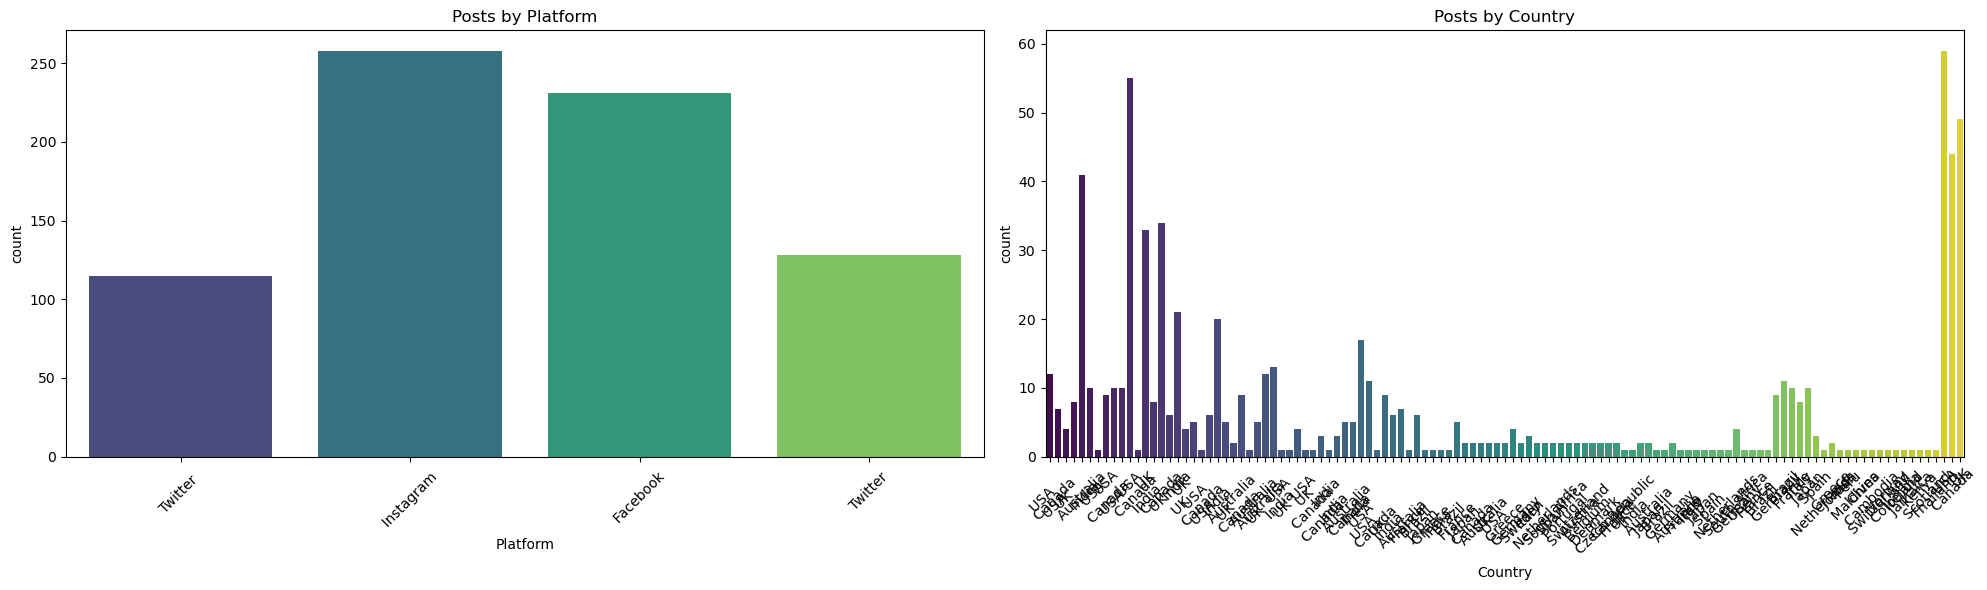

In [10]:
# Platform and Country Analysis
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_cleaned, x='Platform', palette='viridis')
plt.title('Posts by Platform')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df_cleaned, x='Country', palette='viridis')
plt.title('Posts by Country')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


* Twitter and Instagram are the most popular platforms for posting, followed by Facebook.
* This indicates a preference for certain social media platforms among the users in the dataset.
* The majority of posts come from users in the USA, followed by Canada and the UK.
* This could reflect the geographic distribution of the user base or the focus of data collection.

## Conclusion
The exploratory data analysis (EDA) of the sentiment dataset provided valuable insights into the sentiment distribution, engagement metrics, posting patterns, and platform and geographic preferences of social media users. Key findings include:

### Sentiment Analysis:
* The dataset is predominantly positive, with "Positive" sentiment being the most common, followed by "Joy" and "Excitement."
* This indicates a generally positive tone in the social media posts.

### Engagement Metrics:
* Both retweets and likes exhibit a normal distribution, with average engagement levels being moderate.
* This suggests that while most posts receive moderate attention, there are some outliers with significantly higher engagement.

### Temporal Analysis:
* Posting activity is highest in recent years (2021-2023), consistent throughout the months and days, and peaks in the afternoon and evening hours.
* This could be due to increased social media usage in recent years and habitual posting times.

### Platform and Geographic Analysis:
* Twitter and Instagram are the preferred platforms for posting, highlighting their popularity among users.
* The majority of posts originate from the USA, with significant contributions from Canada and the UK, indicating a primarily Western user base.